<a href="https://colab.research.google.com/github/pedroblossbraga/Statistics-Python/blob/master/ARIMA_Research_IN_PROGRESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **ARIMA**

# **AR** -> Auto-Regressive term


# **I** -> Integrative term


# **MA** -> Moving Average



##################################################

## 3.1. Auto-ARIMA example


In [2]:

# Here’s a quick example of how we can fit an auto_arima with pmdarima:
!pip install pmdarima

import numpy as np
import pmdarima as pm
from pmdarima.datasets import load_wineind

# this is a dataset from R
wineind = load_wineind().astype(np.float64)

# fit stepwise auto-ARIMA
stepwise_fit = pm.auto_arima(wineind, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise


# It’s easy to examine your model fit results. Simply use the summary method:

stepwise_fit.summary()


     |████████████████████████████████| 1.5MB 3.5MB/s 
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3066.760, BIC=3082.229, Fit time=1.670 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=3133.376, BIC=3139.564, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=3099.734, BIC=3112.109, Fit time=0.353 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3066.930, BIC=3079.305, Fit time=0.395 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=3131.408, BIC=3134.502, Fit time=0.047 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=3088.088, BIC=3100.463, Fit time=0.240 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3067.459, BIC=3086.022, Fit time=2.325 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=3068.000, BIC=3086.563, Fit time=1.765 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=3071.925, BIC=3087.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  176
Model:             SARIMAX(1, 1, 2)x(0, 1, 1, 12)   Log Likelihood               -1527.371
Date:                            Fri, 17 Jan 2020   AIC                           3066.742
Time:                                    17:02:18   BIC                           3085.305
Sample:                                         0   HQIC                          3074.278
                                            - 176                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -100.7331     72.197     -1.395      0.163    -242.236      40.770
ar.L1         -0.5123      0.390     -1.312      0.189      -1.277       0.253
ma.L1         -0.0806      0.404     -0.200      0.842      -0.872       0.711
ma.L2         -0.4430      0.224     -1.978      0.048      -0.882      -0.004
ma.S.L12      -0.4025      0.054     -7.448      0.000      -0.508      -0.297
sigma2      7.663e+06    7.3e+05     10.495      0.000    6.23e+06    9.09e+06
===================================================================================
Ljung-Box (Q):                       48.70   Jarque-Bera (JB):                21.57
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.61
Prob(H) (two-sided):                  0.54   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.14e+14. Standard errors may be unstable.
"""

##################################################################

# **6.1. Understand p, d, and q**

ARIMA models are made up of three different terms:

- p: The order of the auto-regressive (AR) model (i.e., the number of lag observations)


- d: The degree of differencing.


- q: The order of the moving average (MA) model. This is essentially the size of the “window” function over your time series data.


The parameters p and q can be iteratively searched-for with the auto_arima function, but **the differencing term, d, requires a special set of tests of stationarity to estimate.**



In [0]:
from pmdarima.arima.stationarity import ADFTest
from pmdarima.utils import c, diff
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima

import matplotlib.pyplot as plt


##########################################################################################################################################################################
def checa_estacionariedade(arr, return_p_value=False, acf=False):
    """ arr deve ser ts.values. Teste de homocedasticidade (variancia unitaria e media nula) da serie temporal """
    # Testa se deve diferenciar ao nivel alpha=0.5
    # nivel de significancia
    adf_test = ADFTest(alpha=0.05)

    p_val, should_diff = adf_test.should_diff(arr) 
    print(should_diff)

    if acf == True:
      pm.plot_acf(arr)

    if return_p_value == True:
        return p_val, should_diff
    else:
        return should_diff
##########################################################################################################################################################################

def estima_n_diff(arr, test='adf'):
    # Estimate the number of differences using an ADF test:

    n_adf = ndiffs(arr, test)

    # Or a KPSS test (auto_arima default) test='kpss'

    # Or a PP test if test='pp'

    return n_adf

##########################################################################################################################################################################
def plot_pred(ts, y_pred_arima):
    ############
    x=[]
    for k in range(len(y_pred_arima)):
      x.append(ts.index[-1]+1+k)
    tspred = pd.Series(y_pred_arima)
    tspred.index =x

    plt.plot(ts.index, ts.values, label='ts')
    plt.legend(loc='best')
    plt.scatter(ts.index, ts.values, color='black')
    plt.plot(tspred.index, tspred.values, c='red', label='pred')
    plt.legend(loc='best')
    plt.scatter(tspred.index, tspred.values, color='black')
    plt.show()
    ################

def aplica_arima_variavel(ts, n_previsoes):  
    modelo_auto = auto_arima(ts, seasonal = True, trace = True)
    modelo_auto.summary()
    
    train = ts[:-n_previsoes]
    #test = ts[-n_previsoes:]
    
    modelo_auto.fit(train)

    y_pred_arima = modelo_auto.predict(n_periods = n_previsoes)

    plot_pred(ts, y_pred_arima)

    return y_pred_arima

##########################################################################################################################################################################

def aplica_arima_forecast(ts, n_previsoes):  

    #if checa_estacionariedade(ts.values) == True:
     #   d = estima_n_diff
      #  ts.values = diff(ts.values, lag=1, differences=d)

    modelo_auto = auto_arima(ts, seasonal = True, trace = True)
    modelo_auto.summary()
    
    train = ts
    #test = ts[-n_previsoes:]
    
    modelo_auto.fit(train)

    y_pred_arima = modelo_auto.predict(n_periods = n_previsoes)

    plot_pred(ts, y_pred_arima)

    return(y_pred_arima, modelo_auto)

def aplica_arima_variavel2(ts, n_previsoes):  

    if checa_estacionariedade(ts.values) == True:
        d = estima_n_diff
        ts.values = diff(ts.values, lag=1, differences=d)

    modelo_auto = auto_arima(ts, seasonal = True, trace = True)
    modelo_auto.summary()
    
    train = ts[:-n_previsoes]
    #test = ts[-n_previsoes:]
    
    modelo_auto.fit(train)

    y_pred_arima = modelo_auto.predict(n_periods = n_previsoes)

    plot_pred(ts, y_pred_arima)

    return y_pred_arima

##########################################################################################################################################################################

def aplica_arima_forecast2(ts, n_previsoes):  

    if checa_estacionariedade(ts.values) == True:
        d = estima_n_diff
        ts.values = diff(ts.values, lag=1, differences=d)

    modelo_auto = auto_arima(ts, seasonal = True, trace = True)
    modelo_auto.summary()
    
    train = ts
    #test = ts[-n_previsoes:]
    
    modelo_auto.fit(train)

    y_pred_arima = modelo_auto.predict(n_periods = n_previsoes)

    plot_pred(ts, y_pred_arima)

    return(y_pred_arima, modelo_auto)

In [11]:
import numpy as np
import pandas as pd
from random import randint

x = []
for k in range(100):
  x.append(randint(-100,100))
x = np.array(x)
ts = pd.Series(x)
ts

0     52
1    -82
2     63
3      9
4     -9
      ..
95   -98
96    -3
97    61
98   -80
99   -92
Length: 100, dtype: int64

In [0]:
def cria_ts():
  x = []
  for k in range(100):
    x.append(randint(-100,100))
  x = np.array(x)
  ts = pd.Series(x)
  return ts

True


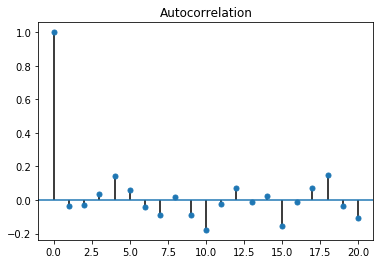

True

In [13]:
checa_estacionariedade(ts, acf=True)

In [17]:
n_adf = ndiffs(ts.values, test='adf')
n_adf

1

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1108.057, BIC=1123.688, Fit time=0.240 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1100.113, BIC=1105.323, Fit time=0.011 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1102.092, BIC=1109.908, Fit time=0.069 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1102.092, BIC=1109.907, Fit time=0.047 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1098.797, BIC=1101.402, Fit time=0.007 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1104.062, BIC=1114.482, Fit time=0.170 seconds
Total fit time: 0.560 seconds


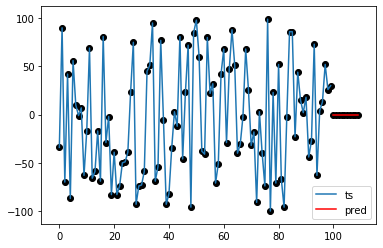

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
aplica_arima_variavel(ts=ts, n_previsoes=10)

False
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1101.793, BIC=1117.424, Fit time=0.273 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1103.306, BIC=1108.516, Fit time=0.010 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1100.068, BIC=1107.884, Fit time=0.066 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1098.268, BIC=1106.083, Fit time=0.075 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1101.694, BIC=1104.299, Fit time=0.007 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1099.755, BIC=1110.176, Fit time=0.124 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1099.487, BIC=1109.907, Fit time=0.096 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1100.943, BIC=1113.969, Fit time=0.165 seconds
Total fit time: 0.827 seconds


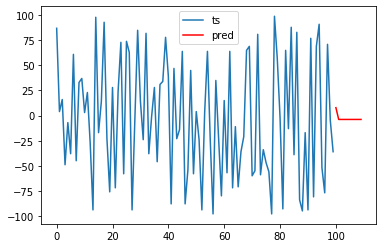

array([ 7.90228403, -3.84258484, -3.84258484, -3.84258484, -3.84258484,
       -3.84258484, -3.84258484, -3.84258484, -3.84258484, -3.84258484])

In [32]:
aplica_arima_variavel2(ts=ts, n_previsoes=10)

In [31]:
n_previsoes=10
ts = cria_ts()


# sem o teste de estacionariedade

modelo_auto = auto_arima(ts, seasonal = True, trace = True)
modelo_auto.summary()

train = ts
#test = ts[-n_previsoes:]

modelo_auto.fit(train)

y_pred_arima = modelo_auto.predict(n_periods = n_previsoes)
print(y_pred_arima, modelo_auto)

# com teste de estacionariedade

if checa_estacionariedade(ts.values) == True:
        d = estima_n_diff
        ts.values = diff(ts.values, lag=1, differences=d)

modelo_auto2 = auto_arima(ts, seasonal = True, trace = True)
modelo_auto2.summary()

train2 = ts
#test = ts[-n_previsoes:]

modelo_auto2.fit(train2)

y_pred_arima2 = modelo_auto2.predict(n_periods = n_previsoes)
print(y_pred_arima2, modelo_auto2)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1101.793, BIC=1117.424, Fit time=0.266 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1103.306, BIC=1108.516, Fit time=0.010 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1100.068, BIC=1107.884, Fit time=0.070 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1098.268, BIC=1106.083, Fit time=0.074 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1101.694, BIC=1104.299, Fit time=0.007 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1099.755, BIC=1110.176, Fit time=0.118 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1099.487, BIC=1109.907, Fit time=0.106 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1100.943, BIC=1113.969, Fit time=0.176 seconds
Total fit time: 0.833 seconds
[ 4.41235127 -3.87575626 -3.87575626 -3.87575626 -3.87575626 -3.87575626
 -3.87575626 -3.87575626 -3.87575626 -3.8

False


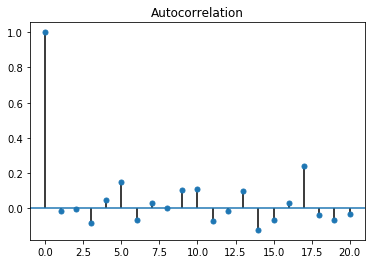

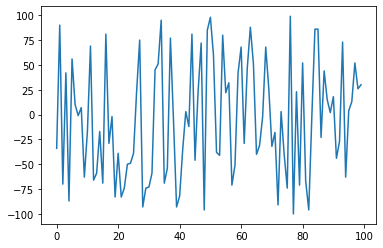

In [50]:
ts = cria_ts()

checa_estacionariedade(ts.values)

pm.plot_acf(ts)
plt.show()

plt.plot(ts)
plt.show()

False


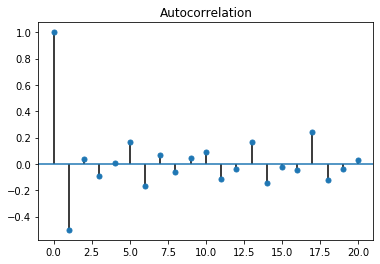

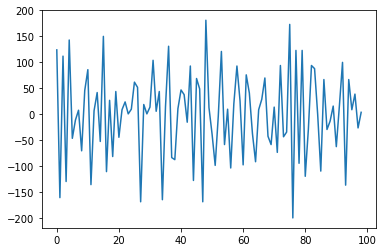

In [55]:
ts_diff = pd.Series(diff(ts.values, lag=1))

checa_estacionariedade(ts_diff.values)

pm.plot_acf(ts_diff)
plt.show()

plt.plot(ts_diff)
plt.show()

In [48]:
ts_diff.values = diff(ts.values, lag=1)
ts_diff

array([   4.,   85.,  -23.,  -71.,  143.,  -15.,  -11.,  -42., -107.,
        122.,  -64.,  132.,  -91.,   44.,  -66.,    3.,   11.,  -30.,
        -41.,  152., -141.,   11.,   29.,  115., -122.,  133., -118.,
        -40.,   90.,   15.,  -86.,   74.,   61., -172.,  176.,  -30.,
         26., -129.,   52.,  -56.,  -46.,  107., -106.,   50.,  -24.,
        -17.,   96.,    6.,  -26.,  -60.,    2.,   71.,  -96.,   63.,
         99., -149.,  118.,  -10.,  -82.,  138., -123.,   27.,  -15.,
        -72.,  119.,   62.,    0.,  -82.,  -68.,   -9.,  110.,  -23.,
         24.,   45., -165.,  154.,  -37.,  -69.,   37.,   28.,  -82.,
         76.,   -5.,   52., -159.,  119.,   34.,  -40., -126.,  111.,
        -40.,   78.,  -68.,  -29.,  110.,  -81.,  -25.,   84., -141.])

## **6.1.1. Understanding differencing (d)**


An **integrative term, d**, is **typically only used** in the case of **non-stationary data**. Stationarity in a time series indicates that a series’ statistical attributes, such as mean, variance, etc., are constant over time (i.e., it exhibits low heteroskedasticity).



### A stationary time series is far more easy to learn and forecast from. 
**With the d parameter, you can force the ARIMA model to adjust for non-stationarity on its own**, without having to worry about doing so manually.



The value of d determines the number of periods to lag the response prior to computing differences. E.g.,

In [61]:
from pmdarima.utils import c, diff

# lag 1, diff 1
x = c(10, 4, 2, 9, 34)
diff(x, lag=1, differences=1)
# Returns: array([ -6.,  -2.,   7.,  25.], dtype=float32)


array([-6., -2.,  7., 25.])

## Note that **lag** and **differences** are **not the same!**
<br>
The lag corresponds to the offset in the time period lag, whereas the differences parameter is the number of times the differences are computed. Therefore, e.g., for differences=2, the procedure is essentially computing the difference twice:

In [68]:
x = c(10, 4, 2, 9, 34)

# 1
x_lag = x[1:]  # first lag
x = x_lag - x[:-1]  # first difference
# x = [ -6.,  -2.,   7.,  25.]

# 2
x_lag = x[1:]  # second lag
x = x_lag - x[:-1]
x

array([ 4,  9, 18])

In [69]:
print('## 1')
print(x)
print(x[1:])
print(x[:-1])
print(x[1:]- x[:-1])

print('## 2')
x = x[1:]- x[:-1]
print(x)
print(x[1:])
print(x[:-1])
print(x[1:]- x[:-1])

## 1
[ 4  9 18]
[ 9 18]
[4 9]
[5 9]
## 2
[5 9]
[9]
[5]
[4]



$lag(v) = v[1:] - v[:-1]$



# **6.1.2. Enforcing stationarity**
<br>
The pmdarima.arima.stationarity sub-module defines various **tests of stationarity** for testing a null hypothesis that an observable univariate time series is stationary around a deterministic trend (i.e. trend-stationary).
<br>
**A time series is stationary when its mean, variance and auto-correlation, etc., are constant over time.** Many time-series methods may perform better when a time-series is stationary, since **forecasting values becomes a far easier task for a stationary time series**. 
<br>

# ARIMAs that include differencing (i.e., d > 0) **assume that the data becomes stationary after differencing.**

<br>
This is called difference-stationary. 

<br>

**Auto-correlation plots are an easy way to determine whether your time series is sufficiently stationary for modeling**.

<br>

If the plot does not appear relatively stationary, your model will likely need a differencing term. 


These can be determined by using an Augmented **Dickey-Fuller test**, or various other statistical testing methods. **Note that auto_arima will automatically determine the appropriate differencing term for you by default.**


## **Observar as funções checa_estacionariedade() e estima_n_diff() que criei**


<br>

The easiest way to make your data stationary in the case of ARIMA models is to allow auto_arima to work its magic, estimate the appropriate d value, and difference the time series accordingly. However, **other common transformations for enforcing stationarity include (sometimes in combination with one another):**


- # Square root or N-th root transformations


- # De-trending your time series


- # Differencing your time series one or more times
    
    
- # Log transformations



Note, however, that a transformation on data as a pre-processing stage will result in forecasts in the transformed space.



 When in doubt, let the auto_arima function do the heavy lifting for you. Read more on difference stationarity in this Duke article.


Duke's article:
https://people.duke.edu/~rnau/411diff.htm

$\tilde{y_{t}}=log(y_{t})−log(y_{t}−1)$

<br>

$\hat{y_{t}}+1=y_{t}.exp(\tilde{\hat{y}}_{t}+1)$

<br>


$log(y_{t})=log(y_{0})+\sum_{i=1}^{t}(log(y_{i})−log(y_{i−1}))$

<br>


$y_{t}=y_{0}.exp(\sum_{i=1}^{t}\tilde{y_{i}})$

# On Transformations:


<br>
https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/

<br>

# **Square Root Transform**




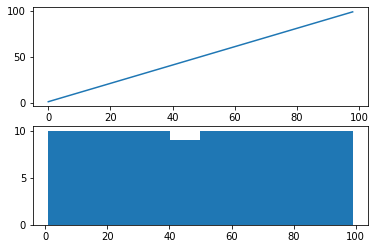

In [70]:
from matplotlib import pyplot
from numpy import sqrt

series = [i**2 for i in range(1,100)]
# sqrt transform
transform = series = sqrt(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()